filtered_stocks = self._ticker_data[(self._ticker_data['ticker'] == 'GOOGL')]


[*********************100%***********************]  1 of 1 completed

import yfinance as yf
import pandas as pd

tickers = ['GOOGL']
start_date = '2013-10-01'
end_date = '2023-10-01'
_strategy_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    _strategy_data[ticker] = data['Close'] 
Loading data...


[{'role': 'system', 'content': 'You are a quantitative analyst. You are given a prompt and a strategy definition. You need to call the strategy with the correct arguments and parameters. Return only the code, no markdown or comments.'}, {'role': 'user', 'content': 'Return the code to call the strategy with the correct arguments and parameters.  Pass the dataframe specifically as "self._strategy_data". Here is the prompt: [I want to use bollinger bands to trade GOOGL for the past 10 years] Here is the class to call: [<function TechnicalAnalysisStrategies.mean_reversion_bollinger_bands at 0x129cedf30>] Here are the arguments and parameters: [OrderedDict([(\'df\', <Parameter "df: pandas.core.frame.DataFrame = None">), (\'window\', <Parameter "window: int = 20">), (\'num_std\', <Parameter "num_std: int = 2">)])] Use uppercase for tickers. The call should look like this: class_name.your_strategy(df=self._strategy_data, *args, **kwargs)'}]
TechnicalAnalysisStrategies.mean_reversion_bollinger

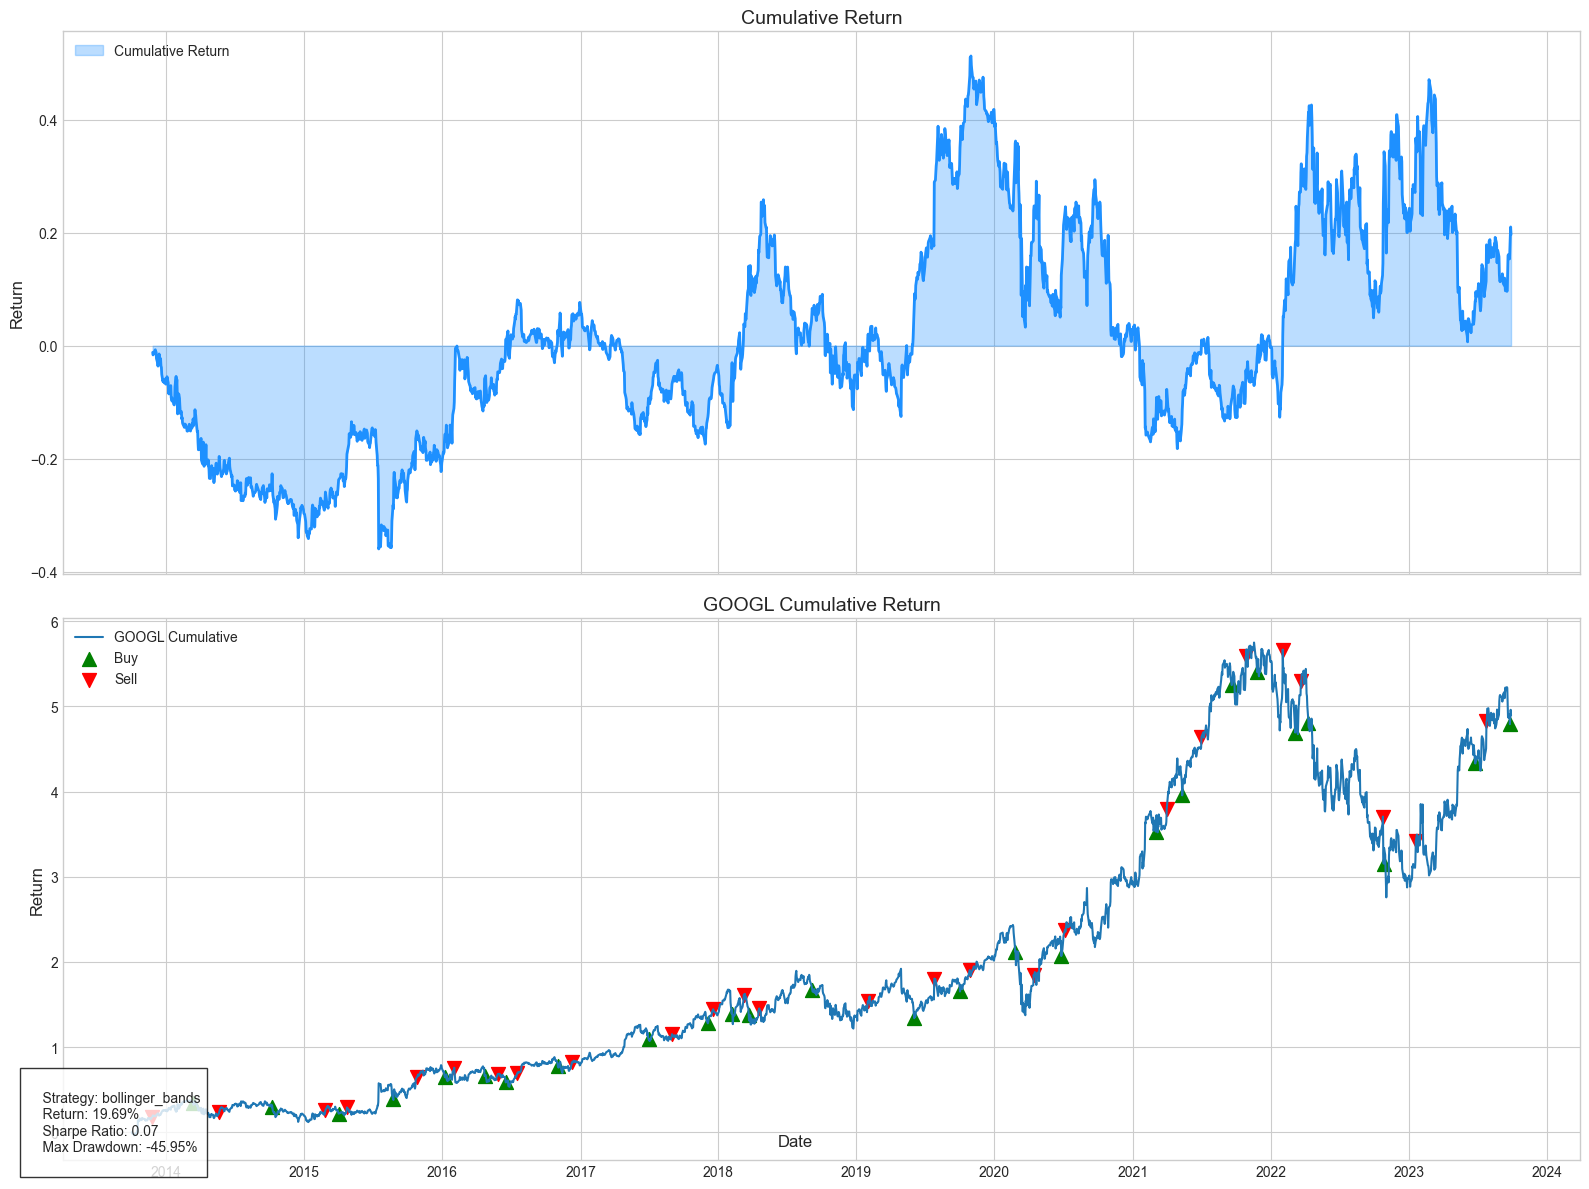

In [2]:
import yfinance as yf
import pandas as pd
from tr4der.tr4der import Tr4der

query = "I want to use bollinger bands to trade GOOGL for the past 10 years"

inst = Tr4der(query)


In [3]:
pd.set_option('display.max_rows', None)
df = inst.strategy_data
df

,GOOGL,GOOGL_return,GOOGL_ma,GOOGL_std,GOOGL_upper_band,GOOGL_lower_band,GOOGL_position,GOOGL_strategy,GOOGL_signal,Total_Return,Cumulative_Return,Drawdown,Date
Date,,,,,,,,,,,,,
2013-10-01,22.197197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-01
2013-10-02,22.221972,0.001116,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-02
2013-10-03,21.924173,-0.013401,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-03
2013-10-04,21.830582,-0.004269,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-04
2013-10-07,21.665165,-0.007577,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-07
2013-10-08,21.363113,-0.013942,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-08
2013-10-09,21.417917,0.002565,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-09
2013-10-10,21.727728,0.014465,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-10
2013-10-11,21.821571,0.004319,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,2013-10-11
